
## Project 2
# Person Tracking, Model YOLO V8
### Teguh Prasetyo
#### 22 Juli - 5 Agustus

Berikut ini adalah Project ke-2 dari Workshop Computer Vision Specialist.

### Objectives
Tim Engineering diminta untuk melakukan implementasi dua algoritma populer untuk mendeteksi objek manusia yaitu **Faster R-CNN** dan **YOLO** dan optimalkan penggunaannya (hyperparameter tuning).

Dari hasil eksperimen, lakukan evaluasi dan penarikan kesimpulan mana algoritma terbaik.


### Tahapan Kerja

Tahapan kerja untuk person tracking ini menggunakan model YOLO V8 dari
[Roboflow](https://roboflow.com) dengan tahapan sebagai berikut:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Aug  5 11:42:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 85.1MB/s]

2023-08-05 11:44:01.889449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 11:44:02.738999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 84.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 59.0ms
Speed: 0.7ms pre-process, 59.0ms inference, 299.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


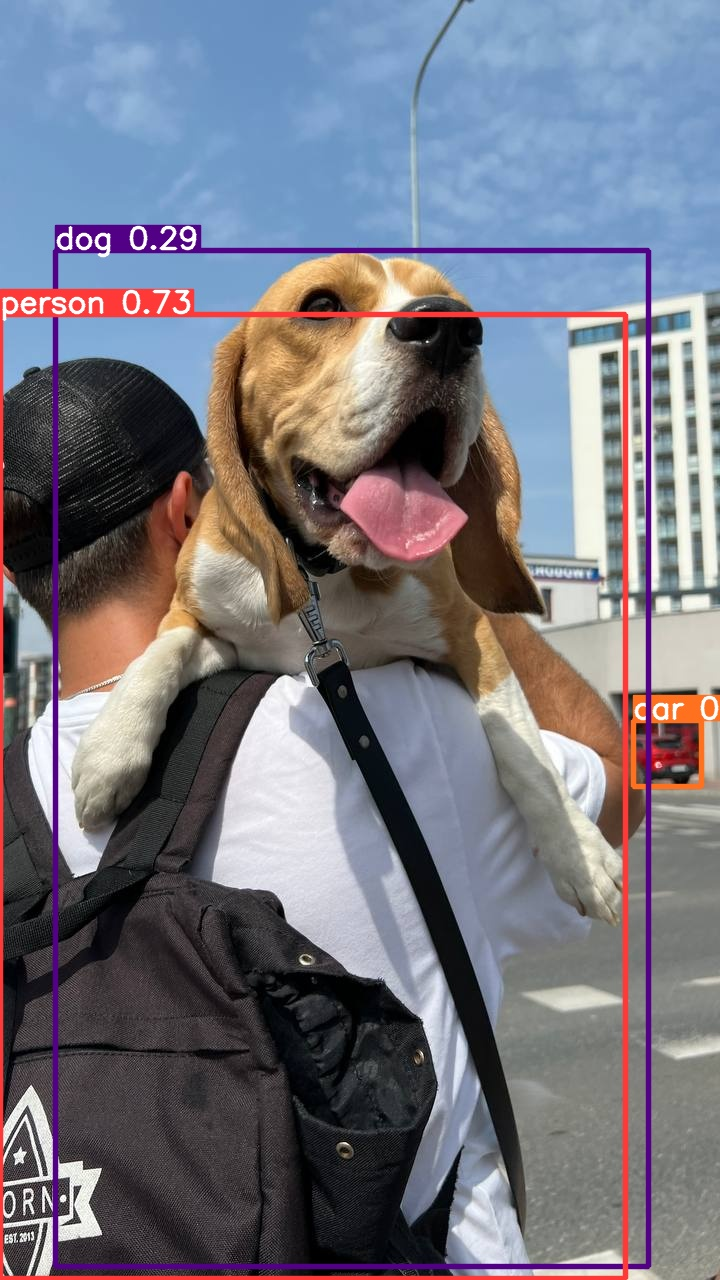

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [8]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [9]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [10]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [11]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#!pip install roboflow --quiet
#
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR_API_KEY")
#project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
#dataset = project.version(1).download("yolov8")

/content/datasets


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yiMOBHCsZG17f9jSuAOd")
project = rf.workspace("tprasetyo").project("person-detection-yolo-v8")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=146d0d85e6818bf3d7b59bd2d625db5a3df6b767d9740402a7cfe36d8b5e5a01
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to Person-Detection---YOLO-v8-1 in yolov8:: 100%|██████████| 7012/7012 [00:01<00:00, 3890.17it/s]


## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 173MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Person-Detection---YOLO-v8-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

In [14]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2310.jpg
confusion_matrix.png				    train_batch2311.jpg
events.out.tfevents.1691236017.d9ec515cd20a.1819.0  train_batch2312.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


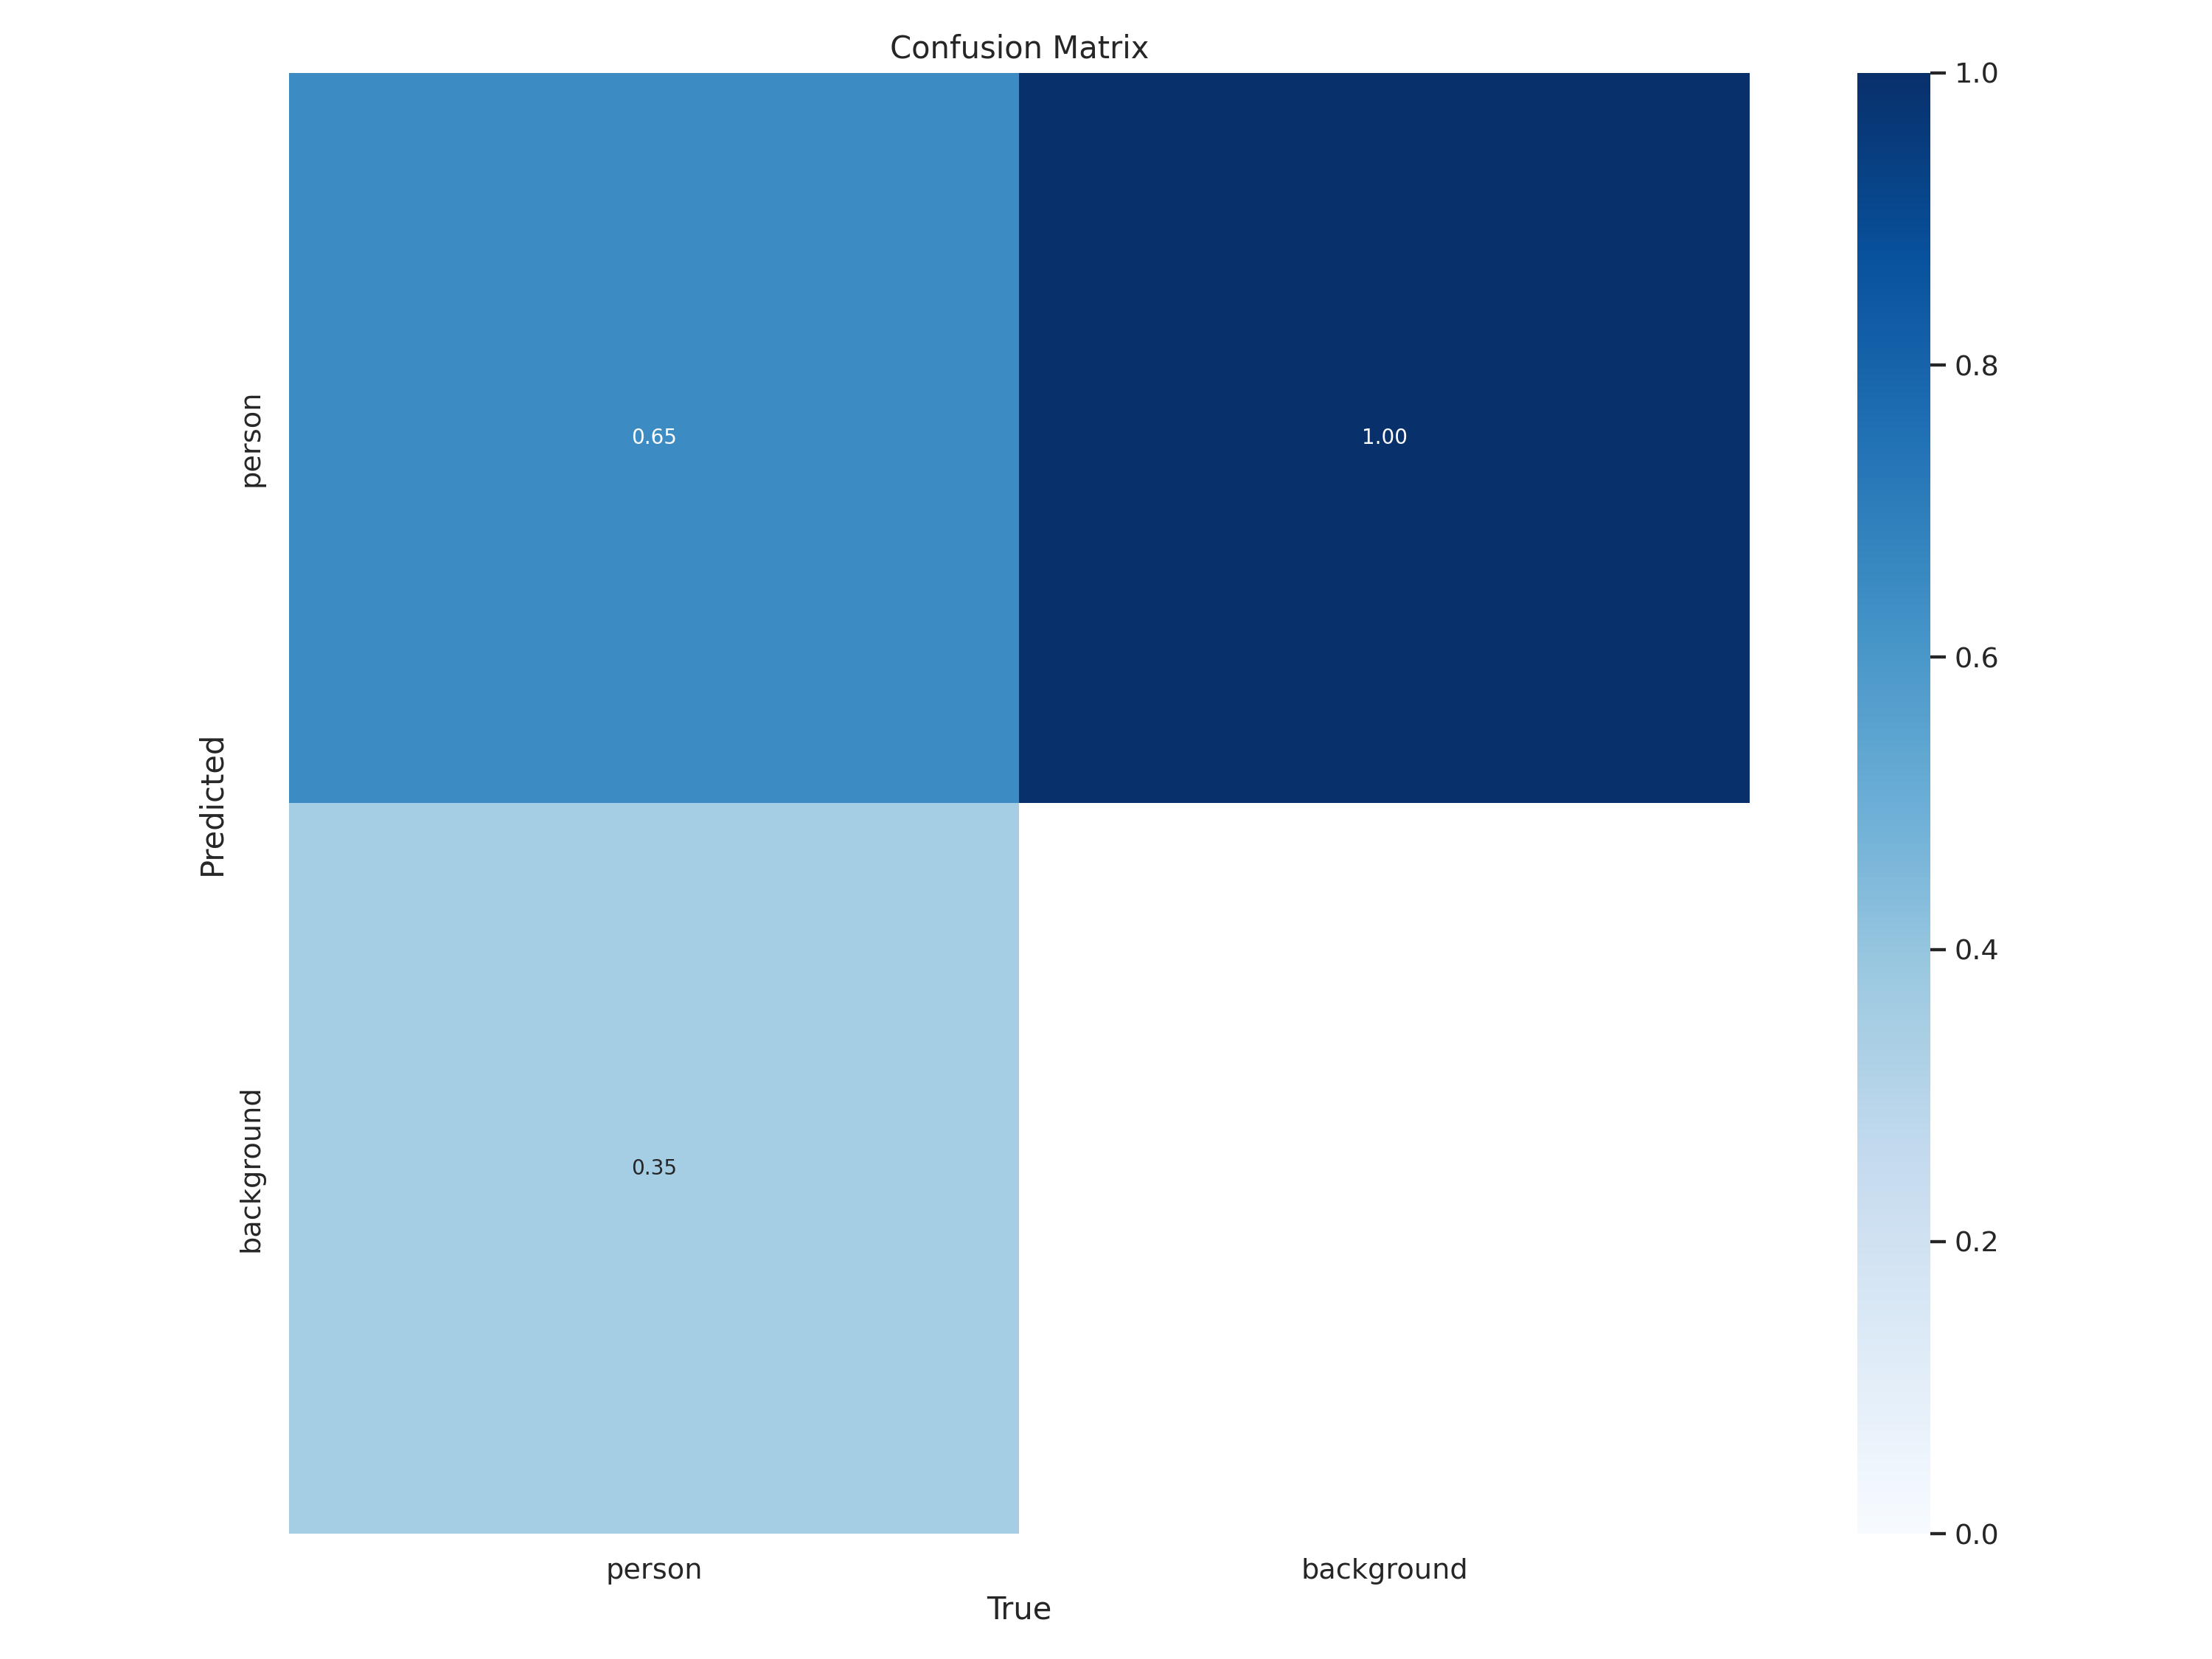

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


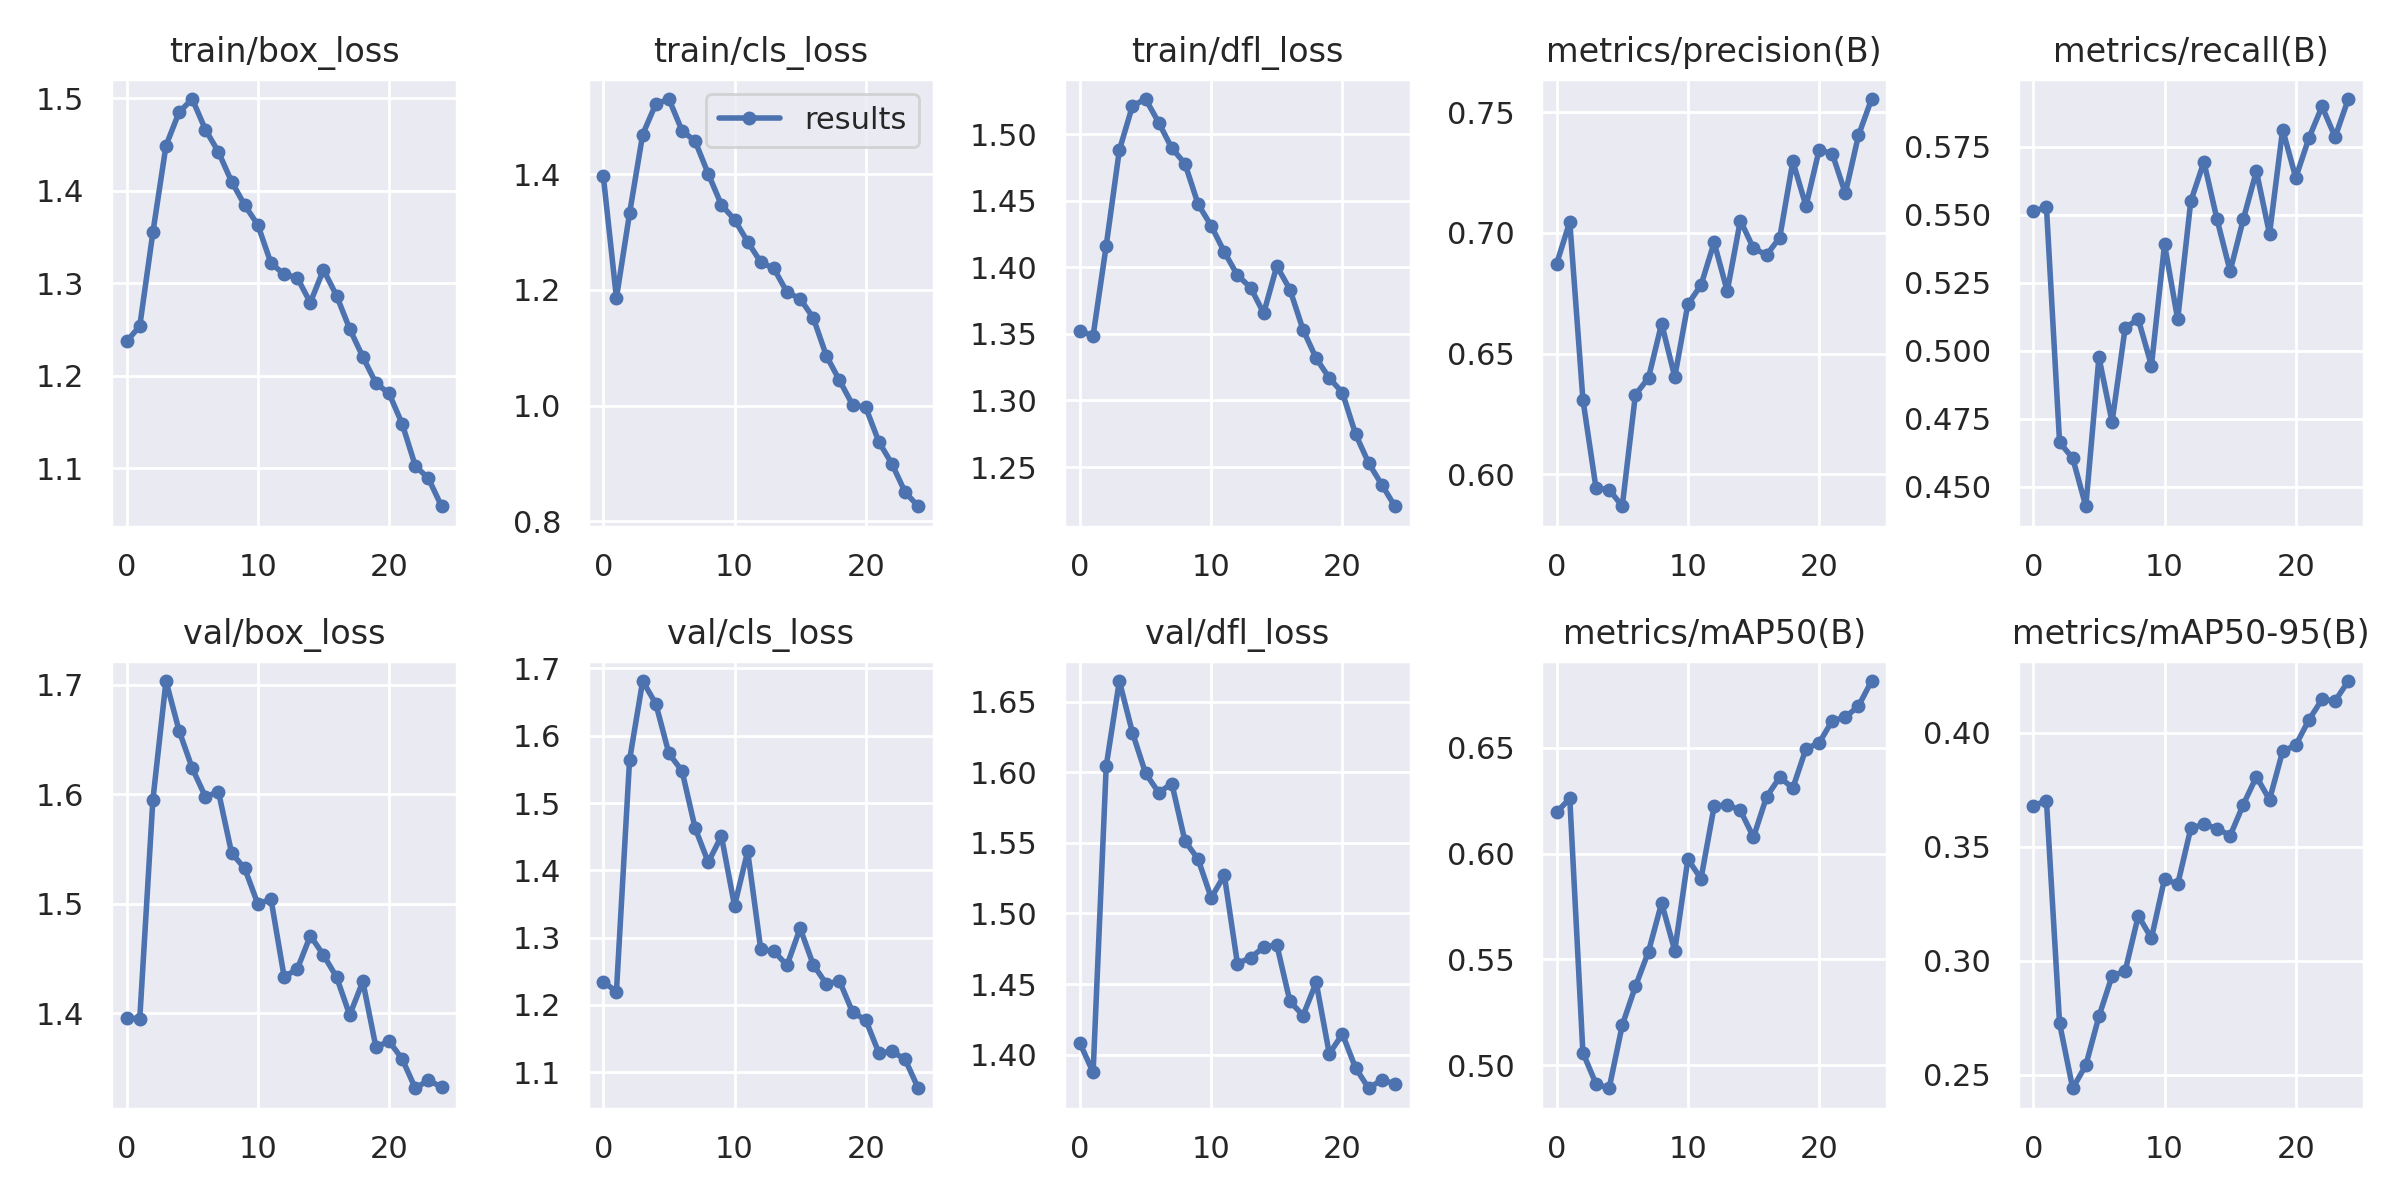

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


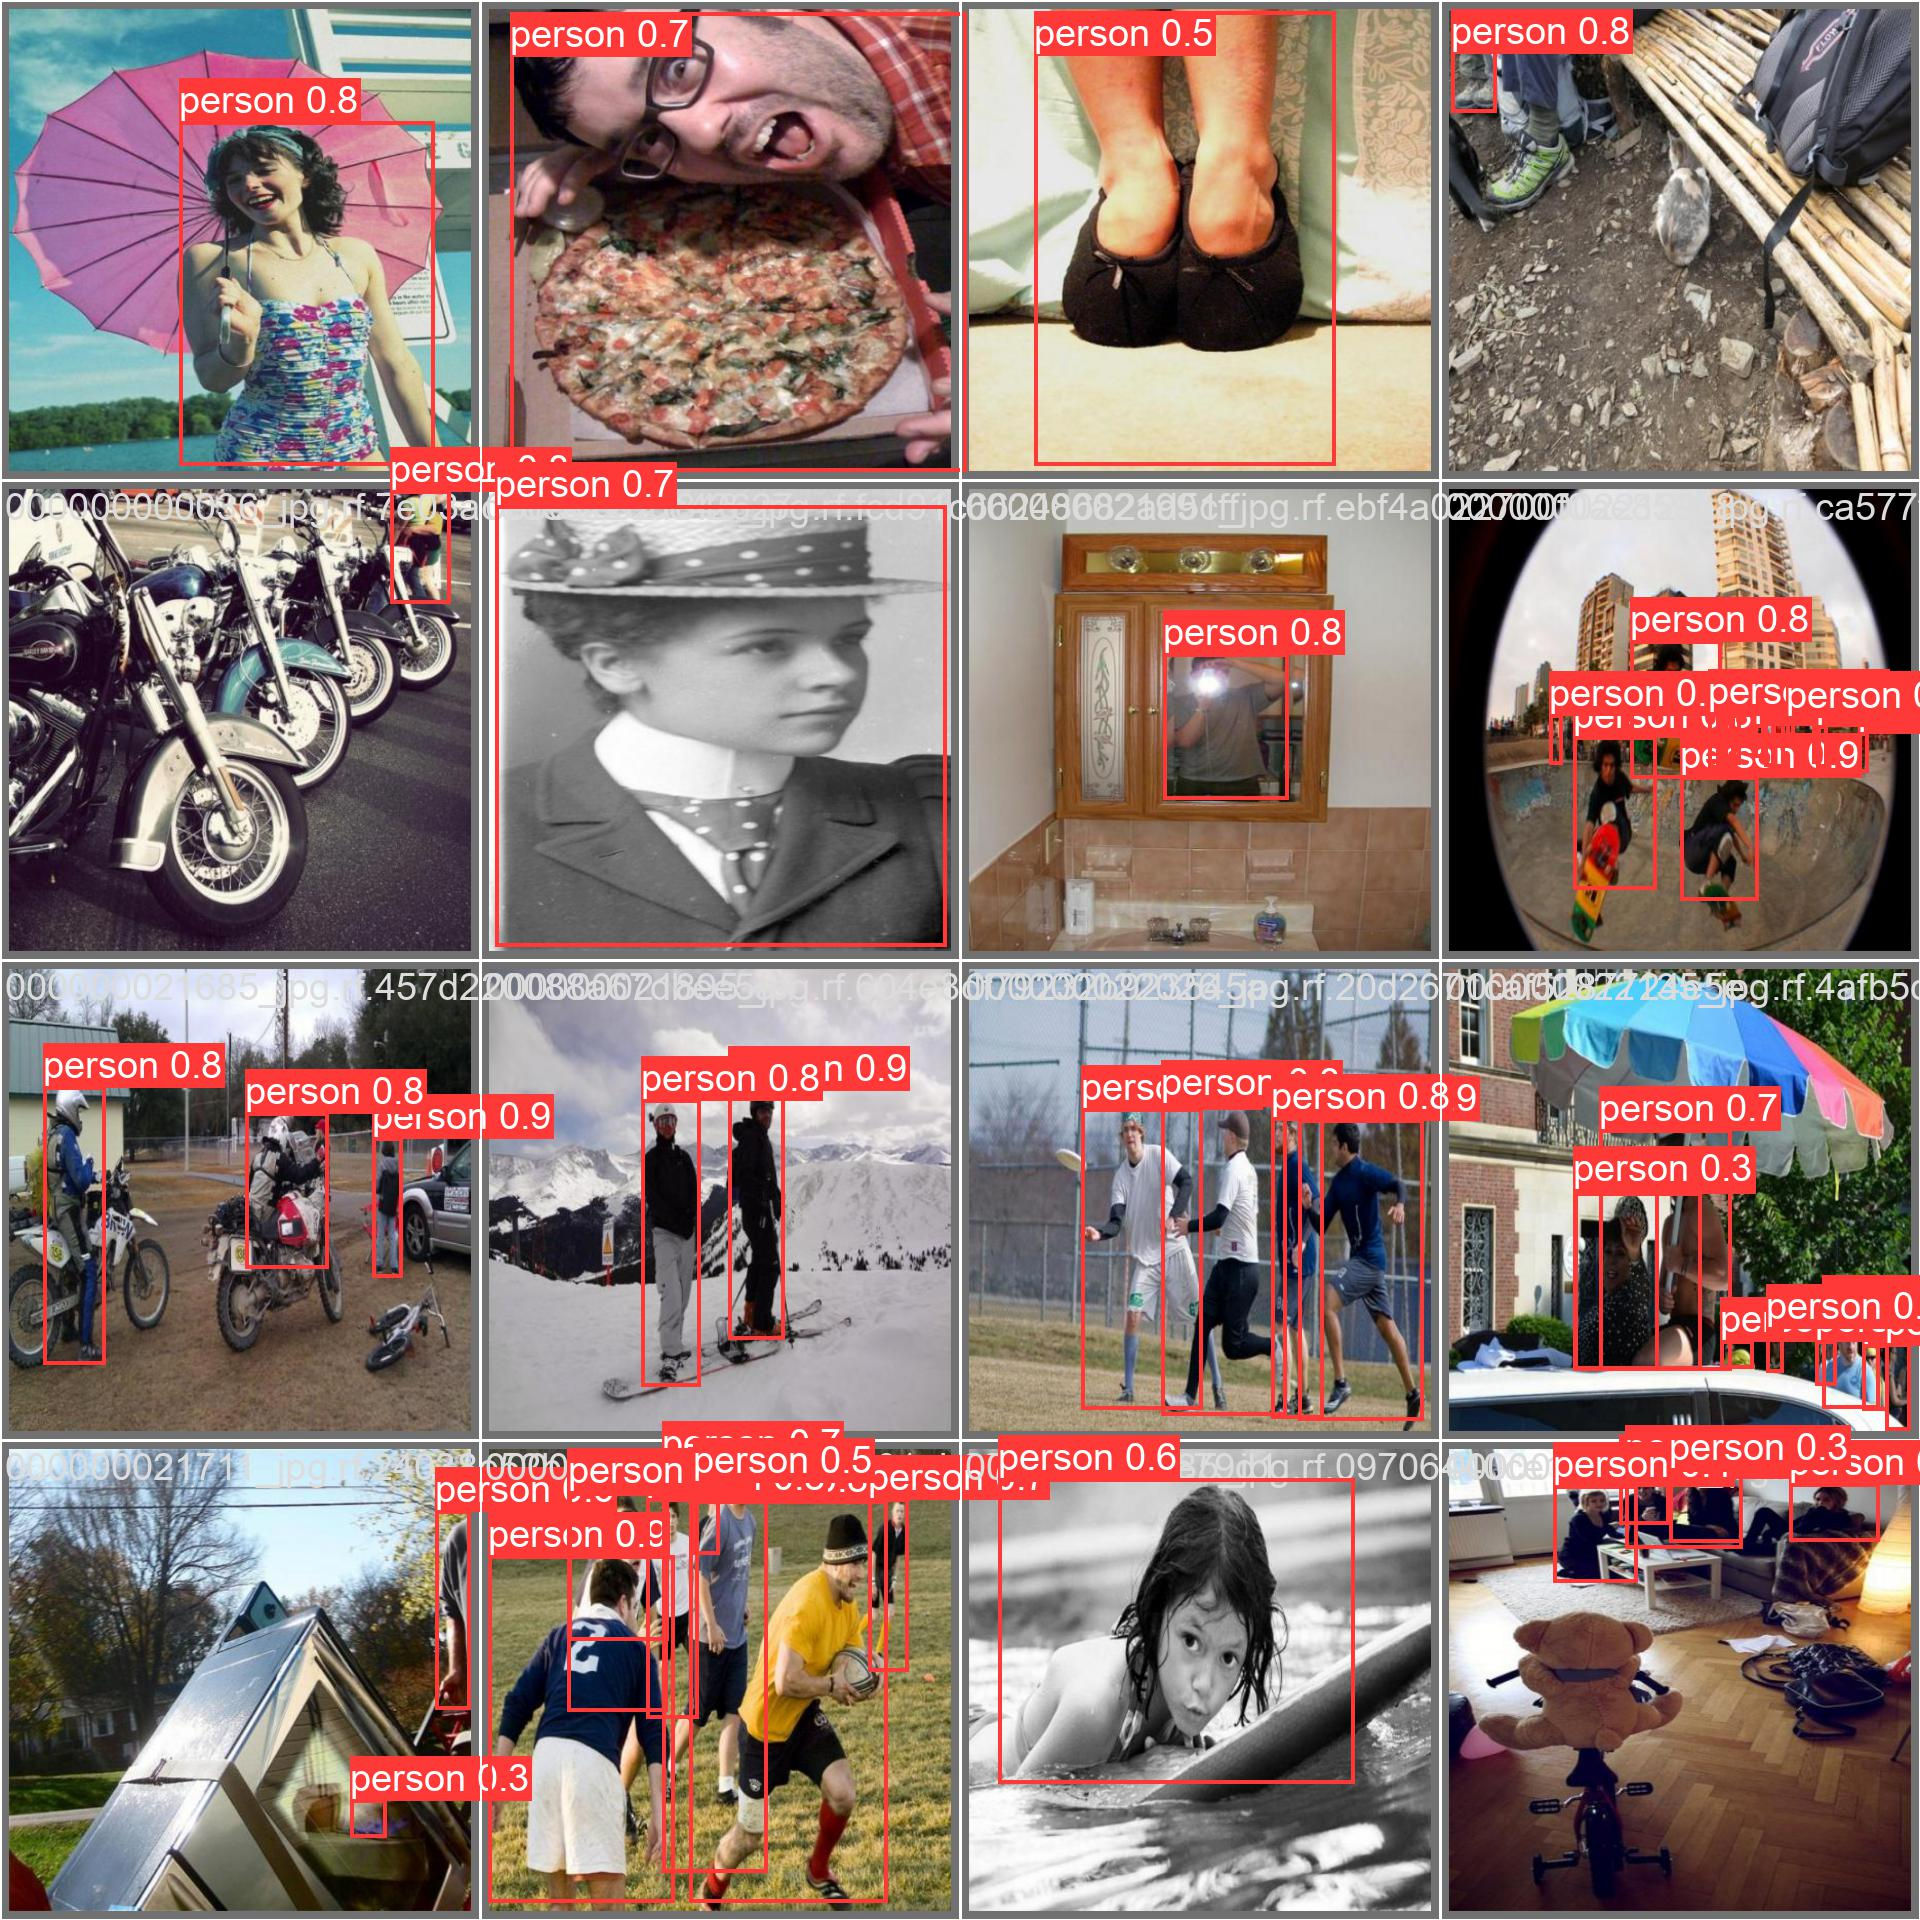

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-05 12:49:48.856639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Person-Detection---YOLO-v8-1/valid/labels.cache... 700 images, 0 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 44/44 [00:20<00:00,  2.13it/s]
                   all        700       2942      0.757      0.592      0.682      0.423
Speed: 1.3ms pre-process, 13.8ms inference, 0.0ms loss, 2.6ms post-process per image


## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-05 12:51:02.635235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/350 /content/datasets/Person-Detection---YOLO-v8-1/test/images/000000000061_jpg.rf.d0bd2f9f1e1c3f0de5a45c7d41b5fc5e.jpg: 800x800 1 person, 24.6ms
image 2/350 /content/datasets/Person-Detection---YOLO-v8-1/test/images/000000000260_jpg.rf.2d06367ef6059380221a92662c794495.jpg: 800x800 2 persons, 24.6ms
image 3/350 /content/datasets/Person-Detection---YOLO-v8-1/test/images/000000000360_jpg.rf.083bf7f3d86cba30b7e428736247de97.jpg: 800x800 1 person, 24.6ms
image 4/350 /content/datasets/Person-Detection---YOLO-v8-1/test/images/000000000382_jpg.rf.ea6a2c9176fdb95dea533439f6a484b3.jpg: 800x800 1 person, 24.6ms
image 5/350 /content/datasets/Person-Detection---YOLO-v8-1/test/images/00000000038

**NOTE:** Let's take a look at few results.

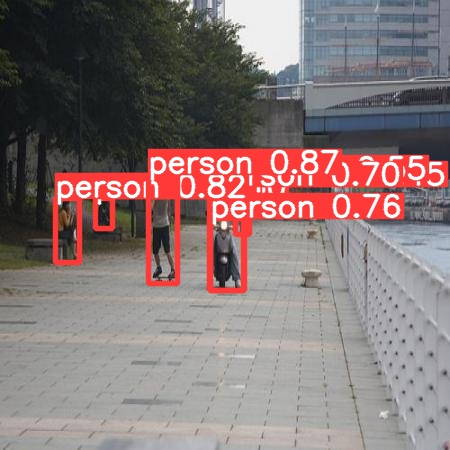

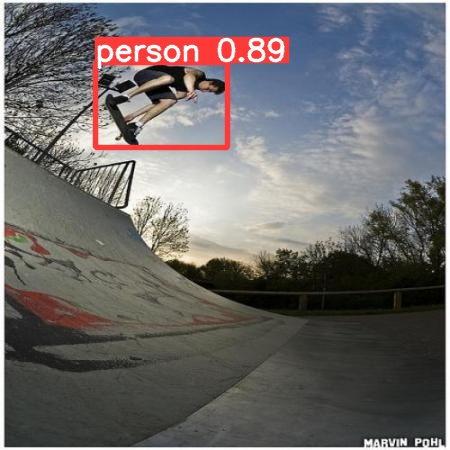

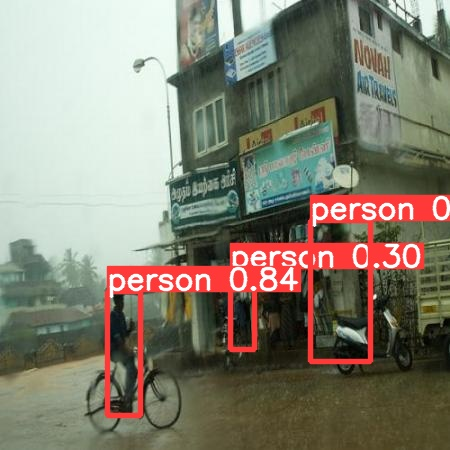

In [24]:
#
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Memprediksi Image Baru

In [25]:
# Memprediksi Data Baru
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source = /content/ save=True

/content
2023-08-05 14:03:30.101334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/2 /content/TAPG_Office_2.jpg: 544x800 1 person, 59.3ms
image 2/2 /content/dog.jpeg: 800x480 1 person, 61.7ms
Speed: 0.6ms pre-process, 60.5ms inference, 47.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


In [26]:
# Menampilkan hasil prediksi
import glob
from IPython.display import Image, display

image_directory = '/content/runs/detect/predict3/*.JPG'
image_paths = glob.glob(image_directory)

if not image_paths:
    print("No images found in the specified directory.")
else:
    for imageName in image_paths:
        try:
            display(Image(filename=imageName))
            print("\n")
        except Exception as e:
            print(f"Error displaying image: {e}")
# Code Modif from ChatGPT

No images found in the specified directory.


## Aknowledgement

Code untuk training model Person Tracking ini diperoleh dari Roboflow dan beberapa modifikasi.

Dataset diperoleh dari COCO2017 yang telah di subset oleh Muhammad Ihsan
